In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv('SalaryData_Train.csv')

In [10]:
df_test = pd.read_csv('SalaryData_Test.csv')

In [4]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
df['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [8]:
df['Salary'] = [0 if x== ' <=50K' else 1 for x in df['Salary']]

In [11]:
df_test['Salary'] = [0 if x== ' <=50K' else 1 for x in df_test['Salary']]

In [12]:
df['Salary'].value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

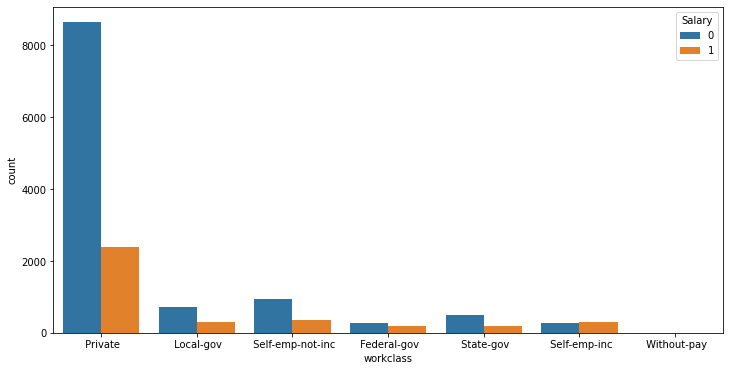

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(ax=ax, x=df['workclass'],hue=df['Salary']);

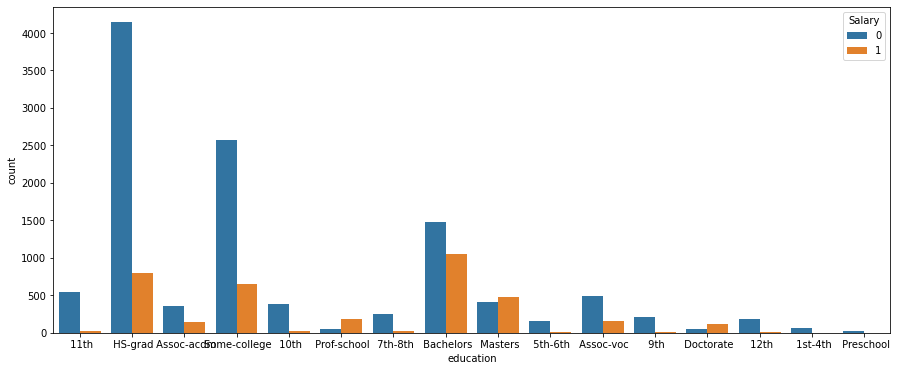

In [14]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=df['education'],hue=df['Salary']);

In [15]:
df.drop('educationno',axis=1,inplace=True)

In [16]:
df_test.drop('educationno',axis=1,inplace=True)

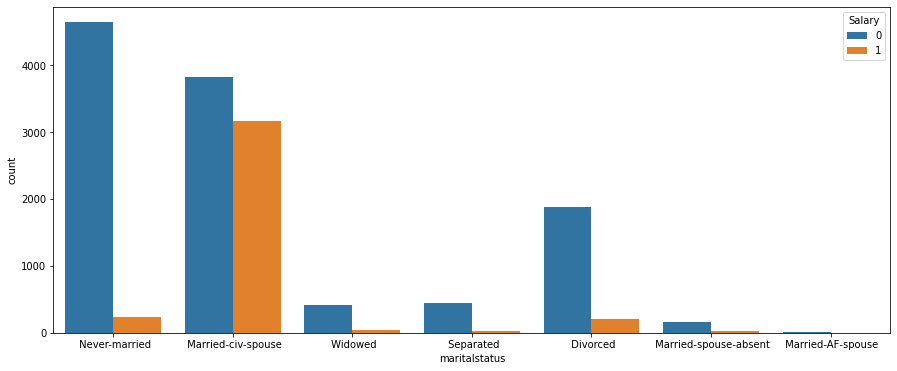

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=df['maritalstatus'],hue=df['Salary']);

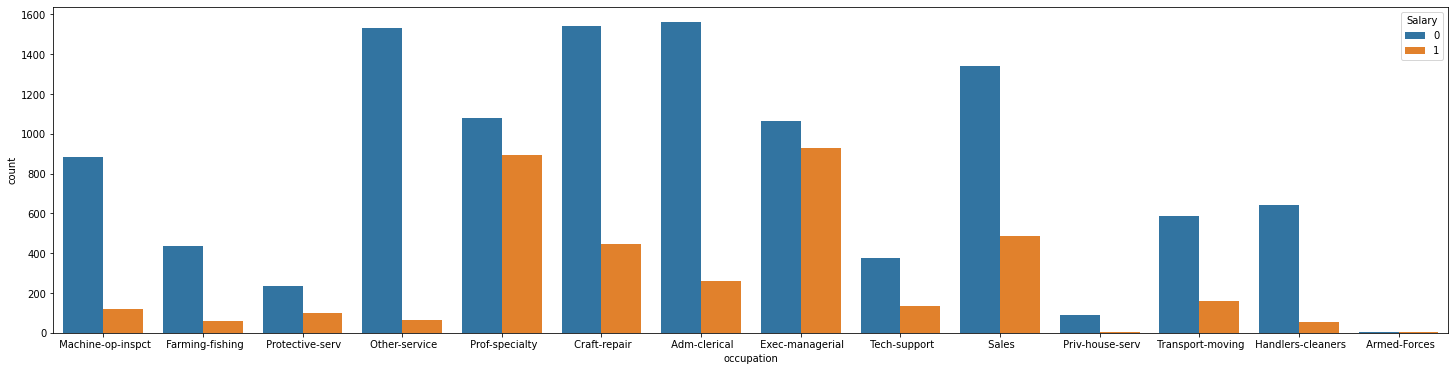

In [18]:
fig, ax = plt.subplots(figsize=(25,6))
sns.countplot(x=df['occupation'],hue=df['Salary']);

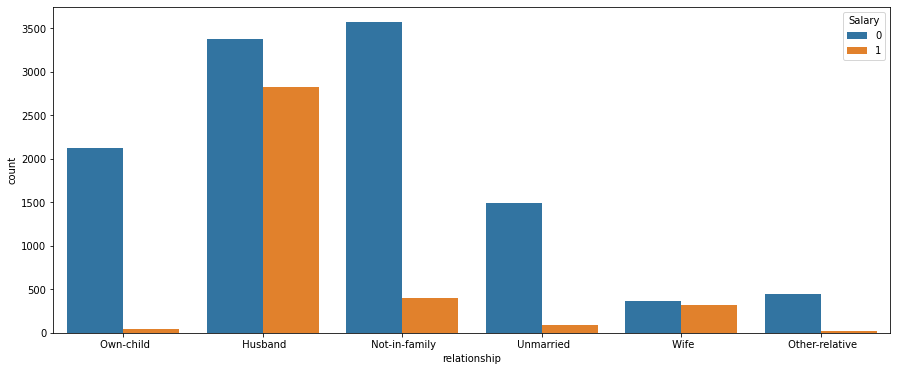

In [19]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=df['relationship'],hue=df['Salary']);

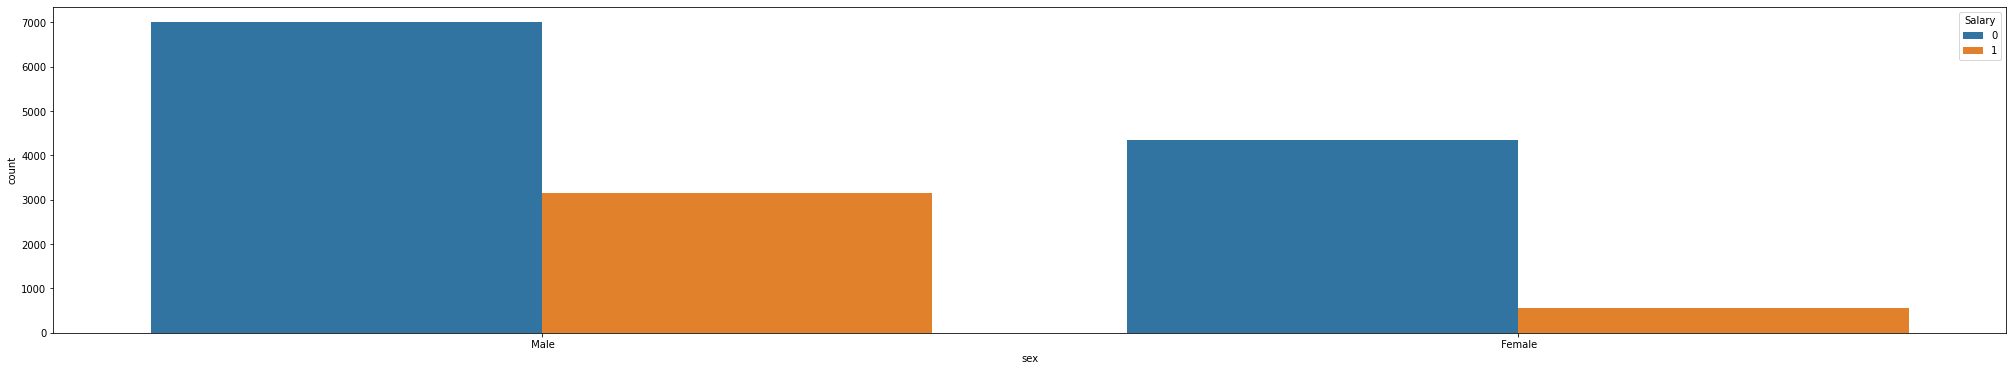

In [20]:
fig, ax = plt.subplots(figsize=(35,6))
sns.countplot(x=df['sex'],hue=df['Salary']);

In [21]:
df = pd.get_dummies(df,drop_first=True)

In [22]:
df_test = pd.get_dummies(df_test,drop_first=True)

In [23]:
df.corr()

,age,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,...,sex_ Male,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
age,1.000000,0.078760,0.057745,0.102758,0.227469,0.054745,-0.208149,0.098253,0.167119,0.017452,0.012115,-0.101692,-0.044075,0.038285,0.040259,0.123597,0.014453,-0.005168,-0.003510,-0.004075,0.064880,0.015907,0.092040,0.006365,0.068309,-0.101745,-0.015697,0.303306,0.016313,-0.532679,0.017982,0.272539,-0.005677,0.005100,0.101725,0.037158,-0.085891,-0.021057,-0.087469,0.041154,...,0.082265,0.030247,0.006221,0.000361,0.030906,-0.002232,0.001022,-0.028303,0.007285,0.010780,-0.005370,0.017801,-0.025756,0.000851,-0.002389,-0.005059,0.013663,0.002659,-0.006311,0.003831,0.015025,0.009827,-0.010802,0.002719,-0.043084,0.008413,0.002768,0.000232,0.006770,0.012531,0.012382,-0.000955,0.030071,-0.003233,-0.006926,0.006293,-0.007570,0.003503,-0.005816,0.008892
capitalgain,0.078760,1.000000,-0.031876,0.090501,0.220882,-0.016926,-0.047502,0.113224,0.018471,-0.006817,-0.003136,-0.023617,-0.015816,-0.008829,-0.004657,-0.014829,-0.013445,-0.012316,-0.004950,0.037485,0.100240,-0.050307,0.047751,-0.003120,0.173194,-0.040019,0.027975,0.068724,-0.006489,-0.061100,-0.009330,-0.008367,0.000803,-0.015731,0.058746,-0.003374,-0.022392,-0.028690,-0.037791,-0.010864,...,0.044843,-0.002866,0.014821,-0.006048,-0.002628,-0.005742,-0.004743,-0.008138,0.004042,-0.003556,0.003213,-0.000994,-0.005688,-0.001615,-0.002534,0.001743,-0.002650,0.010742,-0.004436,-0.000893,0.000616,-0.004652,-0.003676,-0.002371,-0.009725,-0.004592,-0.003353,-0.004592,0.014921,-0.005931,-0.005241,-0.006316,-0.003556,0.001489,0.000762,-0.001877,-0.002179,0.008096,-0.003286,0.003071
capitalloss,0.057745,-0.031876,1.000000,0.057712,0.145967,-0.001063,-0.026207,0.049314,0.006089,-0.002882,0.009582,-0.020251,-0.018353,-0.006110,-0.006382,-0.016535,-0.010101,-0.000465,-0.010707,0.055203,0.021687,-0.038520,0.042924,-0.009288,0.050852,-0.014393,0.003058,0.067151,-0.003730,-0.054930,-0.014036,-0.002067,-0.003994,-0.024189,0.052471,-0.016563,-0.018724,-0.011837,-0.034316,-0.002906,...,0.045360,0.008493,0.010029,0.006413,-0.005175,-0.001515,-0.007148,-0.005409,0.012044,0.004057,-0.009501,-0.007992,-0.008572,-0.002566,0.003903,0.032674,-0.003994,0.000384,0.003435,0.003496,0.002487,-0.000674,-0.002820,0.013880,-0.012951,-0.006920,-0.005053,-0.006920,-0.004001,-0.001132,-0.009459,0.017583,-0.005359,-0.002875,-0.006442,0.002413,-0.005053,0.004940,-0.000519,-0.004726
hoursperweek,0.102758,0.090501,0.057712,1.000000,0.222665,-0.008102,-0.092627,0.118697,0.088353,-0.030334,-0.008086

In [24]:
df.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'Salary',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers

In [25]:
df.drop(['maritalstatus_ Married-civ-spouse','maritalstatus_ Married-AF-spouse',
         'workclass_ Self-emp-not-inc','workclass_ Local-gov',
         'relationship_ Wife',
         'occupation_ Exec-managerial','occupation_ Prof-specialty'],axis=1,inplace=True)

In [26]:
df_test.drop(['maritalstatus_ Married-civ-spouse','maritalstatus_ Married-AF-spouse',
         'workclass_ Self-emp-not-inc','workclass_ Local-gov',
         'relationship_ Wife',
         'occupation_ Exec-managerial','occupation_ Prof-specialty'],axis=1,inplace=True)

In [27]:
df1 = pd.read_csv('SalaryData_Train.csv')

In [28]:
df1['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [29]:
df1['native_bin'] = [1 if x==' United-States' else 0 for x in df1['native']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


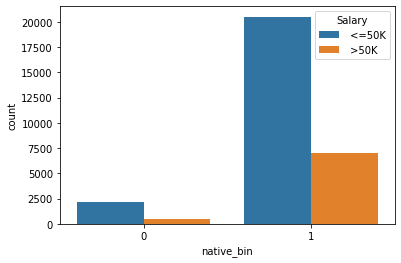

In [30]:
sns.countplot(df1['native_bin'],hue=df1['Salary'])

In [31]:
df.drop(['native_ China', 'native_ Columbia',
       'native_ Cuba', 'native_ Dominican-Republic', 'native_ Ecuador',
       'native_ El-Salvador', 'native_ England', 'native_ France',
       'native_ Germany', 'native_ Greece', 'native_ Guatemala',
       'native_ Haiti', 'native_ Honduras', 'native_ Hong', 'native_ Hungary',
       'native_ India', 'native_ Iran', 'native_ Ireland', 'native_ Italy',
       'native_ Jamaica', 'native_ Japan', 'native_ Laos', 'native_ Mexico',
       'native_ Nicaragua', 'native_ Outlying-US(Guam-USVI-etc)',
       'native_ Peru', 'native_ Philippines', 'native_ Poland',
       'native_ Portugal', 'native_ Puerto-Rico', 'native_ Scotland',
       'native_ South', 'native_ Taiwan', 'native_ Thailand',
       'native_ Trinadad&Tobago', 'native_ United-States', 'native_ Vietnam',
       'native_ Yugoslavia'],axis=1,inplace=True)

In [32]:
df_test.drop(['native_ China', 'native_ Columbia',
       'native_ Cuba', 'native_ Dominican-Republic', 'native_ Ecuador',
       'native_ El-Salvador', 'native_ England', 'native_ France',
       'native_ Germany', 'native_ Greece', 'native_ Guatemala',
       'native_ Haiti', 'native_ Honduras', 'native_ Hong', 'native_ Hungary',
       'native_ India', 'native_ Iran', 'native_ Ireland', 'native_ Italy',
       'native_ Jamaica', 'native_ Japan', 'native_ Laos', 'native_ Mexico',
       'native_ Nicaragua', 'native_ Outlying-US(Guam-USVI-etc)',
       'native_ Peru', 'native_ Philippines', 'native_ Poland',
       'native_ Portugal', 'native_ Puerto-Rico', 'native_ Scotland',
       'native_ South', 'native_ Taiwan', 'native_ Thailand',
       'native_ Trinadad&Tobago', 'native_ United-States', 'native_ Vietnam',
       'native_ Yugoslavia'],axis=1,inplace=True)

In [33]:
df.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'Salary',
       'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Married-spouse-absent',
       'maritalstatus_ Never-married', 'maritalstatus_ Separated',
       'maritalstatus_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'o

In [34]:
df_test.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'Salary',
       'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Married-spouse-absent',
       'maritalstatus_ Never-married', 'maritalstatus_ Separated',
       'maritalstatus_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'o

In [35]:
ros = RandomOverSampler()

In [36]:
X  = df.drop('Salary',axis=1)
y = df['Salary']

In [37]:
X_test = df_test.drop('Salary',axis=1)
y_test = df_test['Salary']

In [38]:
X_ros,y_ros = ros.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [40]:
scaler = StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_ros)

In [45]:
X_test_scaled = scaler.transform(X_test)

In [46]:
gnb = GaussianNB()

In [47]:
gnb.fit(X_train,y_ros)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
prediction = gnb.predict(X_test_scaled)

In [49]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[7546 3814]
 [ 453 3247]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.78     11360
           1       0.46      0.88      0.60      3700

    accuracy                           0.72     15060
   macro avg       0.70      0.77      0.69     15060
weighted avg       0.82      0.72      0.74     15060

